In [1]:
import sys
dir_repo = '../'
sys.path.append(dir_repo)

from galaxy_generator.utils import get_config_from_yaml
from galaxy_generator.vae_generator import VAE_Generator

! rm -rf /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments/vae_test/

In [2]:
config = get_config_from_yaml(dir_repo+'configs/vae_test.yaml')
generator = VAE_Generator(config=config)


------ Parameters ------

exp_name : vae_test
cuda : True
gpu_device : 1
workers : 2
dir_image : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images
file_csv : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo/zoo2/gz2_all_small_v2.csv
label_tag : label_8
num_classes : 8
class_weights : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
f_train : 0.8
f_valid : 0.2
seed : 3
crop_size : 224
input_size : 64
n_channel : 3
n_zlatent : 50
n_filter_E : 64
n_filter_D : 64
num_epochs : 6
batch_size : 16
lr : 0.001
beta1 : 0.5
beta2 : 0.999
step_size : 2
gamma : 0.1
early_stop_threshold : 10
dir_output : /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments
freq_img : 1
Ngals : 9
dpi : 100

------ Prepare Data ------

Number of train galaxies: 800 (50 batches)
Number of valid galaxies: 200 (13 batches)

------ Build Model ------

Number of trainable parameters
Encoder  : 4415876
Decoder  : 3285056

------ Encoder Output Layer Dimensions ------

Input shape:		 to

## --- training --- 

In [3]:
generator.train()


------ Create experiment directory ------

Training information will be stored at :
 	 /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments/vae_test

--- Epoch 1/6 ---
		 avg. train  loss : 3922.924
		 avg. valid  loss : 2999.003
	Time: 0m 2s
--- Epoch 2/6 ---
		 avg. train  loss : 2755.044
		 avg. valid  loss : 2701.261
	Time: 0m 2s
--- Epoch 3/6 ---
		 avg. train  loss : 2691.925
		 avg. valid  loss : 2678.573
	Time: 0m 2s
--- Epoch 4/6 ---
		 avg. train  loss : 2687.970
		 avg. valid  loss : 2669.165
	Time: 0m 2s
--- Epoch 5/6 ---
		 avg. train  loss : 2681.400
		 avg. valid  loss : 2683.554
	Time: 0m 2s
--- Epoch 6/6 ---
		 avg. train  loss : 2678.248
		 avg. valid  loss : 2674.863
	Time: 0m 2s
Minimum validation loss 2669.164892578125 reached at epoch 4


### --- check training logs ---

In [4]:
import pickle

print(f'open file : {generator.file_trainInfo}')
trainInfo = pickle.load(file = open(generator.file_trainInfo, 'rb'))

open file : /home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/experiments/vae_test/trainInfo.pkl


In [5]:
trainInfo.keys()

dict_keys(['train_loss', 'valid_loss', 'epoch_train_loss', 'epoch_valid_loss', 'lr', 'valid_means', 'valid_logvars', 'valid_labels', 'best_epochID', 'best_model_state_dict'])

### Plot training losses

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

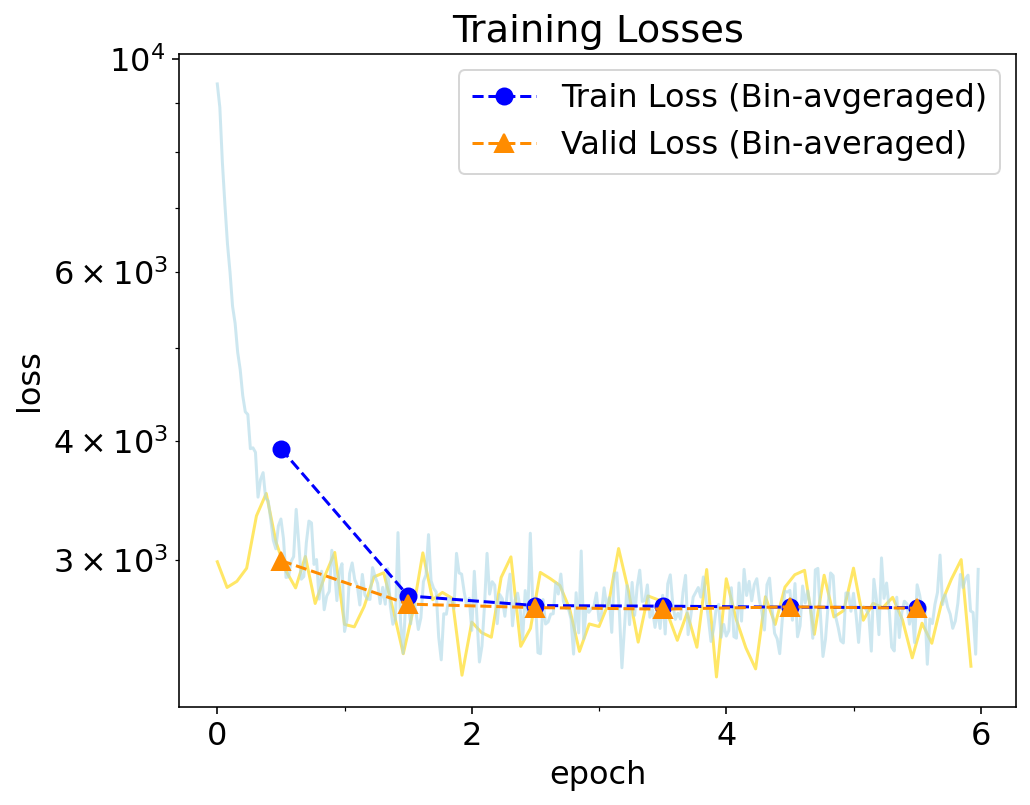

In [7]:
###### Parameters ######
#end = 30
########################

plt.rc('font', size=16)
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6))

iter_tick = np.array(range(len(trainInfo['train_loss'])))/len(generator.dataloader['train'])
epoch_tick = np.array(range(len(trainInfo['epoch_train_loss'])))+0.5
ax.plot(iter_tick , trainInfo['train_loss'], color='lightblue', alpha=0.6, zorder=-1)
ax.plot(epoch_tick, trainInfo['epoch_train_loss'], 'o--', label='Train Loss (Bin-avgeraged)', color='b', markersize=8)


iter_tick = np.array(range(len(trainInfo['valid_loss'])))/len(generator.dataloader['valid'])
epoch_tick = np.array(range(len(trainInfo['epoch_valid_loss'])))+0.5
ax.plot(iter_tick, trainInfo['valid_loss'], color='gold', alpha=0.6, zorder=-2)
ax.plot(epoch_tick, trainInfo['epoch_valid_loss'], '^--', label='Valid Loss (Bin-averaged)', color='darkorange', markersize=9)

ax.set_title(f'Training Losses')

ax.set_yscale('log')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
#ax.set_xlim([0, end])
#ax.set_ylim([0.1, end])
ax.xaxis.set_major_locator(MultipleLocator(2))
# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.legend()

#file_fig = '/home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/out_loss.png'
#fig.savefig(file_fig, dpi=300, transparent=False, facecolor='white')

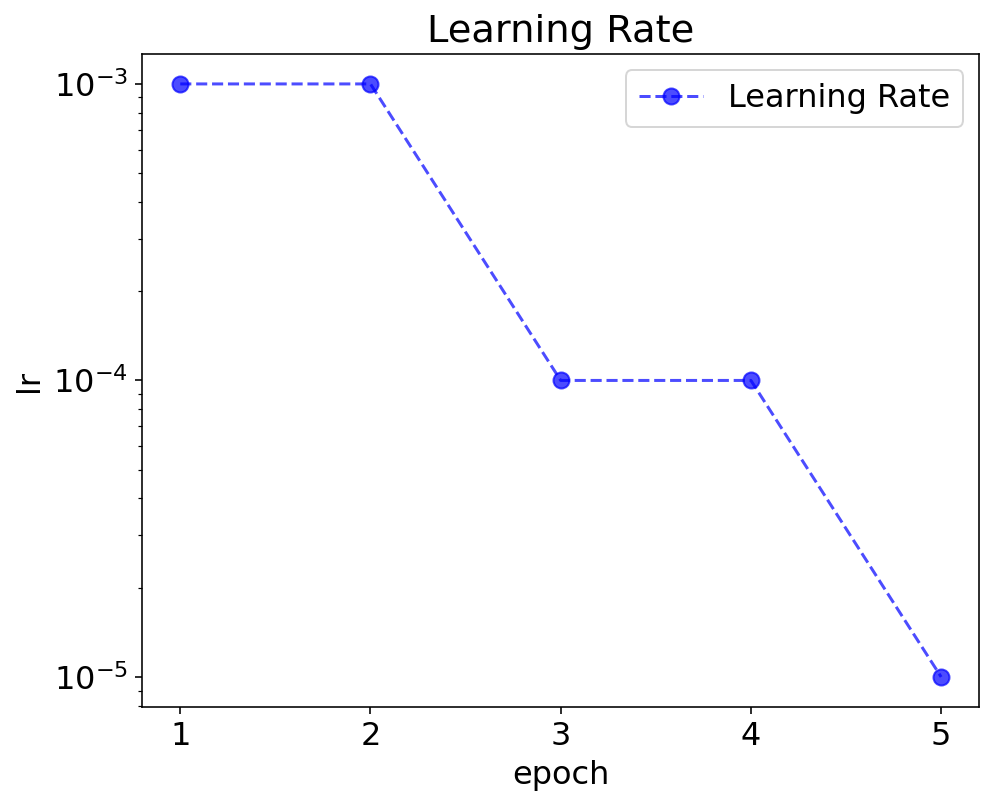

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6))
plt.rc('font', size=16)

epoch_tick = np.array(range(len(trainInfo['lr']))) + 1

ax.plot(epoch_tick[:], trainInfo['lr'][:], 'o--', label='Learning Rate', color='b', markersize=8, alpha=0.7)

ax.set_title(f'Learning Rate')


ax.set_yscale('log')
ax.set_ylabel('lr')
ax.set_xlabel('epoch')
ax.legend()

#file_fig = '/home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/out_lr.png'
#fig.savefig(file_fig, dpi=300, transparent=False, facecolor='white')
#plt.close(fig)

## Draw Galaxy Images

- Use the class method `generator.gen_galaxy` to display generator images at each `epochID`.

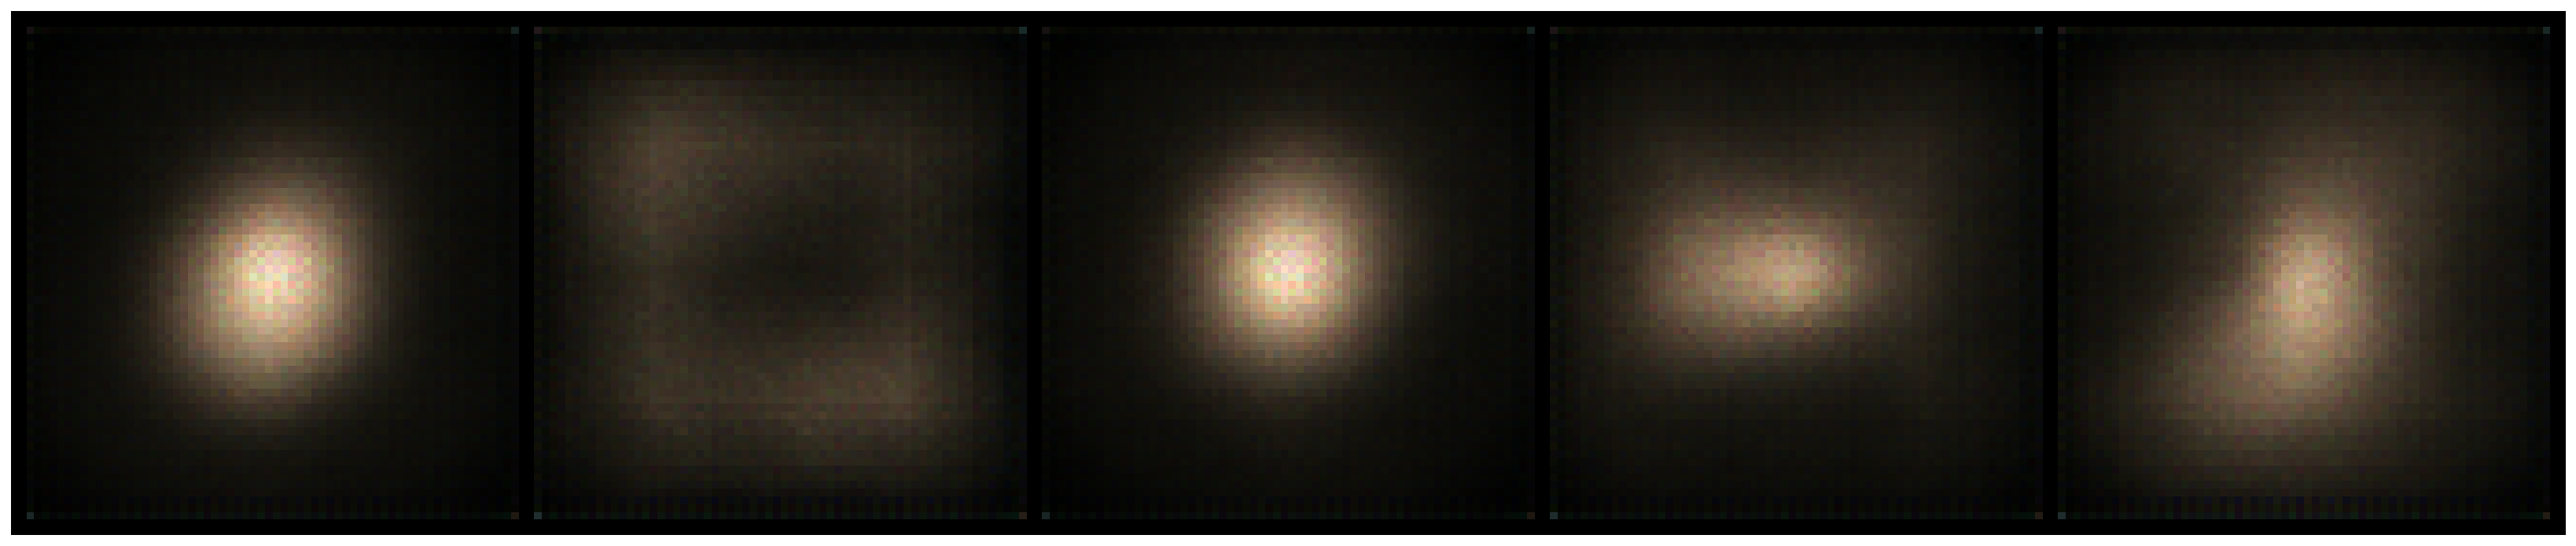

In [9]:
Ngals = 5
epochID = 5
nrow = 1
img_grid = generator.gen_galaxy(Ngals, epochID, nrow=nrow)

# ------ plots ------
fig = plt.figure( figsize=(5*(Ngals//nrow), 5.1*nrow) )
plt.axis("off")
plt.imshow(img_grid)
plt.tight_layout()

# file_fig = f'/home/hhg/Research/galaxyClassify/repo/GalaxyZooGenerator/out_{epochID}.png'
# fig.savefig(file_fig, dpi=300, transparent=False, facecolor='white')
# plt.close(fig)